# Covid-19 Prediction using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:

confirmed_cases = pd.read_csv("time_series_covid_19_confirmed.csv")
deaths_reported = pd.read_csv("time_series_covid_19_deaths.csv")
recovered_cases = pd.read_csv("time_series_covid_19_recovered.csv")

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [4]:
c.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,3,3,3,6,8,12
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [5]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,5
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,10,17,17,31,31,33,44,52
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,65,24,65,29,29,31,31,37,46
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
confirmed_cases.isna().sum()

Province/State    177
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
3/27/20             0
3/28/20             0
3/29/20             0
3/30/20             0
3/31/20             0
Length: 74, dtype: int64

In [7]:
confirmed_cases.isna().sum()

Province/State    177
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
3/27/20             0
3/28/20             0
3/29/20             0
3/30/20             0
3/31/20             0
Length: 74, dtype: int64

In [8]:
recovered_cases.isna().sum()

Province/State    178
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
3/27/20             0
3/28/20             0
3/29/20             0
3/30/20             0
3/31/20             0
Length: 74, dtype: int64

In [9]:
recovered_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,20.542559,29.173319,0.115702,0.123967,0.148760,0.161157,0.214876,0.252066,0.442149,0.520661,...,404.541322,406.409091,446.280992,470.194215,504.752066,540.971074,576.095041,616.041322,680.024793,735.677686
std,24.141785,67.721137,1.799908,1.803962,1.998594,2.066041,2.709156,2.916276,5.173219,5.690640,...,3883.958248,3912.092872,3969.927192,4026.180875,4092.108431,4166.540913,4253.488999,4344.255147,4488.004860,4618.036062
min,-41.454500,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.135000,-7.047400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,22.083350,23.409400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.500000,3.000000,4.000000,5.000000,6.000000,9.000000,10.000000
75%,39.511725,90.267225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.750000,17.750000,29.000000,34.750000,41.750000,45.750000,53.500000,66.750000,74.750000,80.750000
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,59433.000000,59879.000000,60324.000000,60811.000000,61201.000000,61732.000000,62098.000000,62570.000000,62889.000000,63153.000000


In [10]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20'],
      dtype='object')

In [11]:
confirmed =  confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]


In [12]:
confirmed.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,0,0,0,0,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,0,0,0,0,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [13]:

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [14]:
confirmed_sum


857487

In [15]:
death_sum


42107

In [16]:
recovered_sum


178034

In [17]:
world_cases


[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145205,
 156101,
 167454,
 181574,
 197102,
 214821,
 242500,
 272035,
 304396,
 336953,
 378235,
 418045,
 467653,
 529591,
 593291,
 660706,
 720117,
 782365,
 857487]

In [18]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [19]:
days_since_1_22


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69]])

In [20]:
world_cases


array([[   555],
       [   654],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30794],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76819],
       [ 78572],
       [ 78958],
       [ 79561],
       [ 80406],
       [ 81388],
       [ 82746],
       [ 84112],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97886],
       [101801],
       [105847],
       [109821],
       [113590],
       [118620],
       [125875],
       [128352],
       [145205],
       [156101],
       [167454],
       [181574],
       [197102],
       [214821],
       [242500],
       [272035

In [21]:
total_deaths


array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [

In [22]:
total_recovered


array([[    28],
       [    30],
       [    36],
       [    39],
       [    52],
       [    61],
       [   107],
       [   126],
       [   143],
       [   222],
       [   284],
       [   472],
       [   623],
       [   852],
       [  1124],
       [  1487],
       [  2011],
       [  2616],
       [  3244],
       [  3946],
       [  4683],
       [  5150],
       [  6295],
       [  8058],
       [  9395],
       [ 10865],
       [ 12583],
       [ 14352],
       [ 16121],
       [ 18177],
       [ 18890],
       [ 22886],
       [ 23394],
       [ 25227],
       [ 27905],
       [ 30384],
       [ 33277],
       [ 36711],
       [ 39782],
       [ 42716],
       [ 45602],
       [ 48228],
       [ 51170],
       [ 53796],
       [ 55865],
       [ 58358],
       [ 60694],
       [ 62494],
       [ 64404],
       [ 67003],
       [ 68324],
       [ 70251],
       [ 72624],
       [ 76034],
       [ 78088],
       [ 80840],
       [ 83312],
       [ 84975],
       [ 87420

In [23]:

days_in_future = 10
future_forecast = np.array([i for i in range (len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [24]:
future_forecast


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [25]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [26]:

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [27]:
latest_confirmed


0      174
1      243
2      716
3      376
4        7
      ... 
251      5
252      2
253      4
254      2
255      1
Name: 3/31/20, Length: 256, dtype: int64

In [28]:
latest_deaths


0       4
1      15
2      44
3      12
4       2
       ..
251     0
252     0
253     1
254     0
255     0
Name: 3/31/20, Length: 256, dtype: int64

In [29]:
latest_recoveries


0       5
1      52
2      46
3      10
4       1
       ..
237     0
238     0
239     0
240     0
241     0
Name: 3/31/20, Length: 242, dtype: int64

In [30]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [31]:

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [35]:
print('Confirmed Cases by Country/Regions: ')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Country/Regions: 
US: 188172 cases
Italy: 105792 cases
Spain: 95923 cases
China: 82279 cases
Germany: 71808 cases
France: 52827 cases
Iran: 44605 cases
United Kingdom: 25481 cases
Switzerland: 16605 cases
Turkey: 13531 cases
Belgium: 12775 cases
Netherlands: 12667 cases
Austria: 10180 cases
Korea, South: 9786 cases
Canada: 8527 cases
Portugal: 7443 cases
Brazil: 5717 cases
Israel: 5358 cases
Norway: 4641 cases
Australia: 4559 cases
Sweden: 4435 cases
Czechia: 3308 cases
Ireland: 3235 cases
Denmark: 3039 cases
Malaysia: 2766 cases
Chile: 2738 cases
Russia: 2337 cases
Poland: 2311 cases
Romania: 2245 cases
Ecuador: 2240 cases
Luxembourg: 2178 cases
Philippines: 2084 cases
Japan: 1953 cases
Pakistan: 1938 cases
Thailand: 1651 cases
Saudi Arabia: 1563 cases
Indonesia: 1528 cases
Finland: 1418 cases
India: 1397 cases
South Africa: 1353 cases
Greece: 1314 cases
Panama: 1181 cases
Iceland: 1135 cases
Dominican Republic: 1109 cases
Mexico: 1094 cases
Peru: 1065 cases
Argenti

In [36]:
# FIND THE LIST OF UNIQUE PROVINCES
unique_provinces = list(confirmed_cases['Province/State'].unique())
# THOSE ARE COUNTRIES, WHICH ARE NOT PROVINCES/STATES
# outliers = ['United Kingdom', 'Denmark', 'France']
# for i in outliers:
#     try:
#         unique_provinces.remove(i)
#     except ValueError:
#         print(i)
#         break

In [37]:
province_confirmed_cases = []
no_cases = []

for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [38]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 80 cases
New South Wales: 2032 cases
Northern Territory: 17 cases
Queensland: 743 cases
South Australia: 337 cases
Tasmania: 69 cases
Victoria: 917 cases
Western Australia: 364 cases
Alberta: 690 cases
British Columbia: 1013 cases
Grand Princess: 13 cases
Manitoba: 103 cases
New Brunswick: 70 cases
Newfoundland and Labrador: 152 cases
Nova Scotia: 147 cases
Ontario: 1966 cases
Prince Edward Island: 21 cases
Quebec: 4162 cases
Saskatchewan: 184 cases
Anhui: 990 cases
Beijing: 580 cases
Chongqing: 579 cases
Fujian: 343 cases
Gansu: 138 cases
Guangdong: 1494 cases
Guangxi: 254 cases
Guizhou: 146 cases
Hainan: 168 cases
Hebei: 321 cases
Heilongjiang: 484 cases
Henan: 1276 cases
Hong Kong: 714 cases
Hubei: 67801 cases
Hunan: 1018 cases
Inner Mongolia: 107 cases
Jiangsu: 646 cases
Jiangxi: 937 cases
Jilin: 98 cases
Liaoning: 139 cases
Macau: 41 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 253 cases
Shandong: 774 cases
Shanghai: 509 cases
Shanxi: 136 cases


In [39]:
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provincesn.pop(i)
    province_confirmed_cases.pop(i)

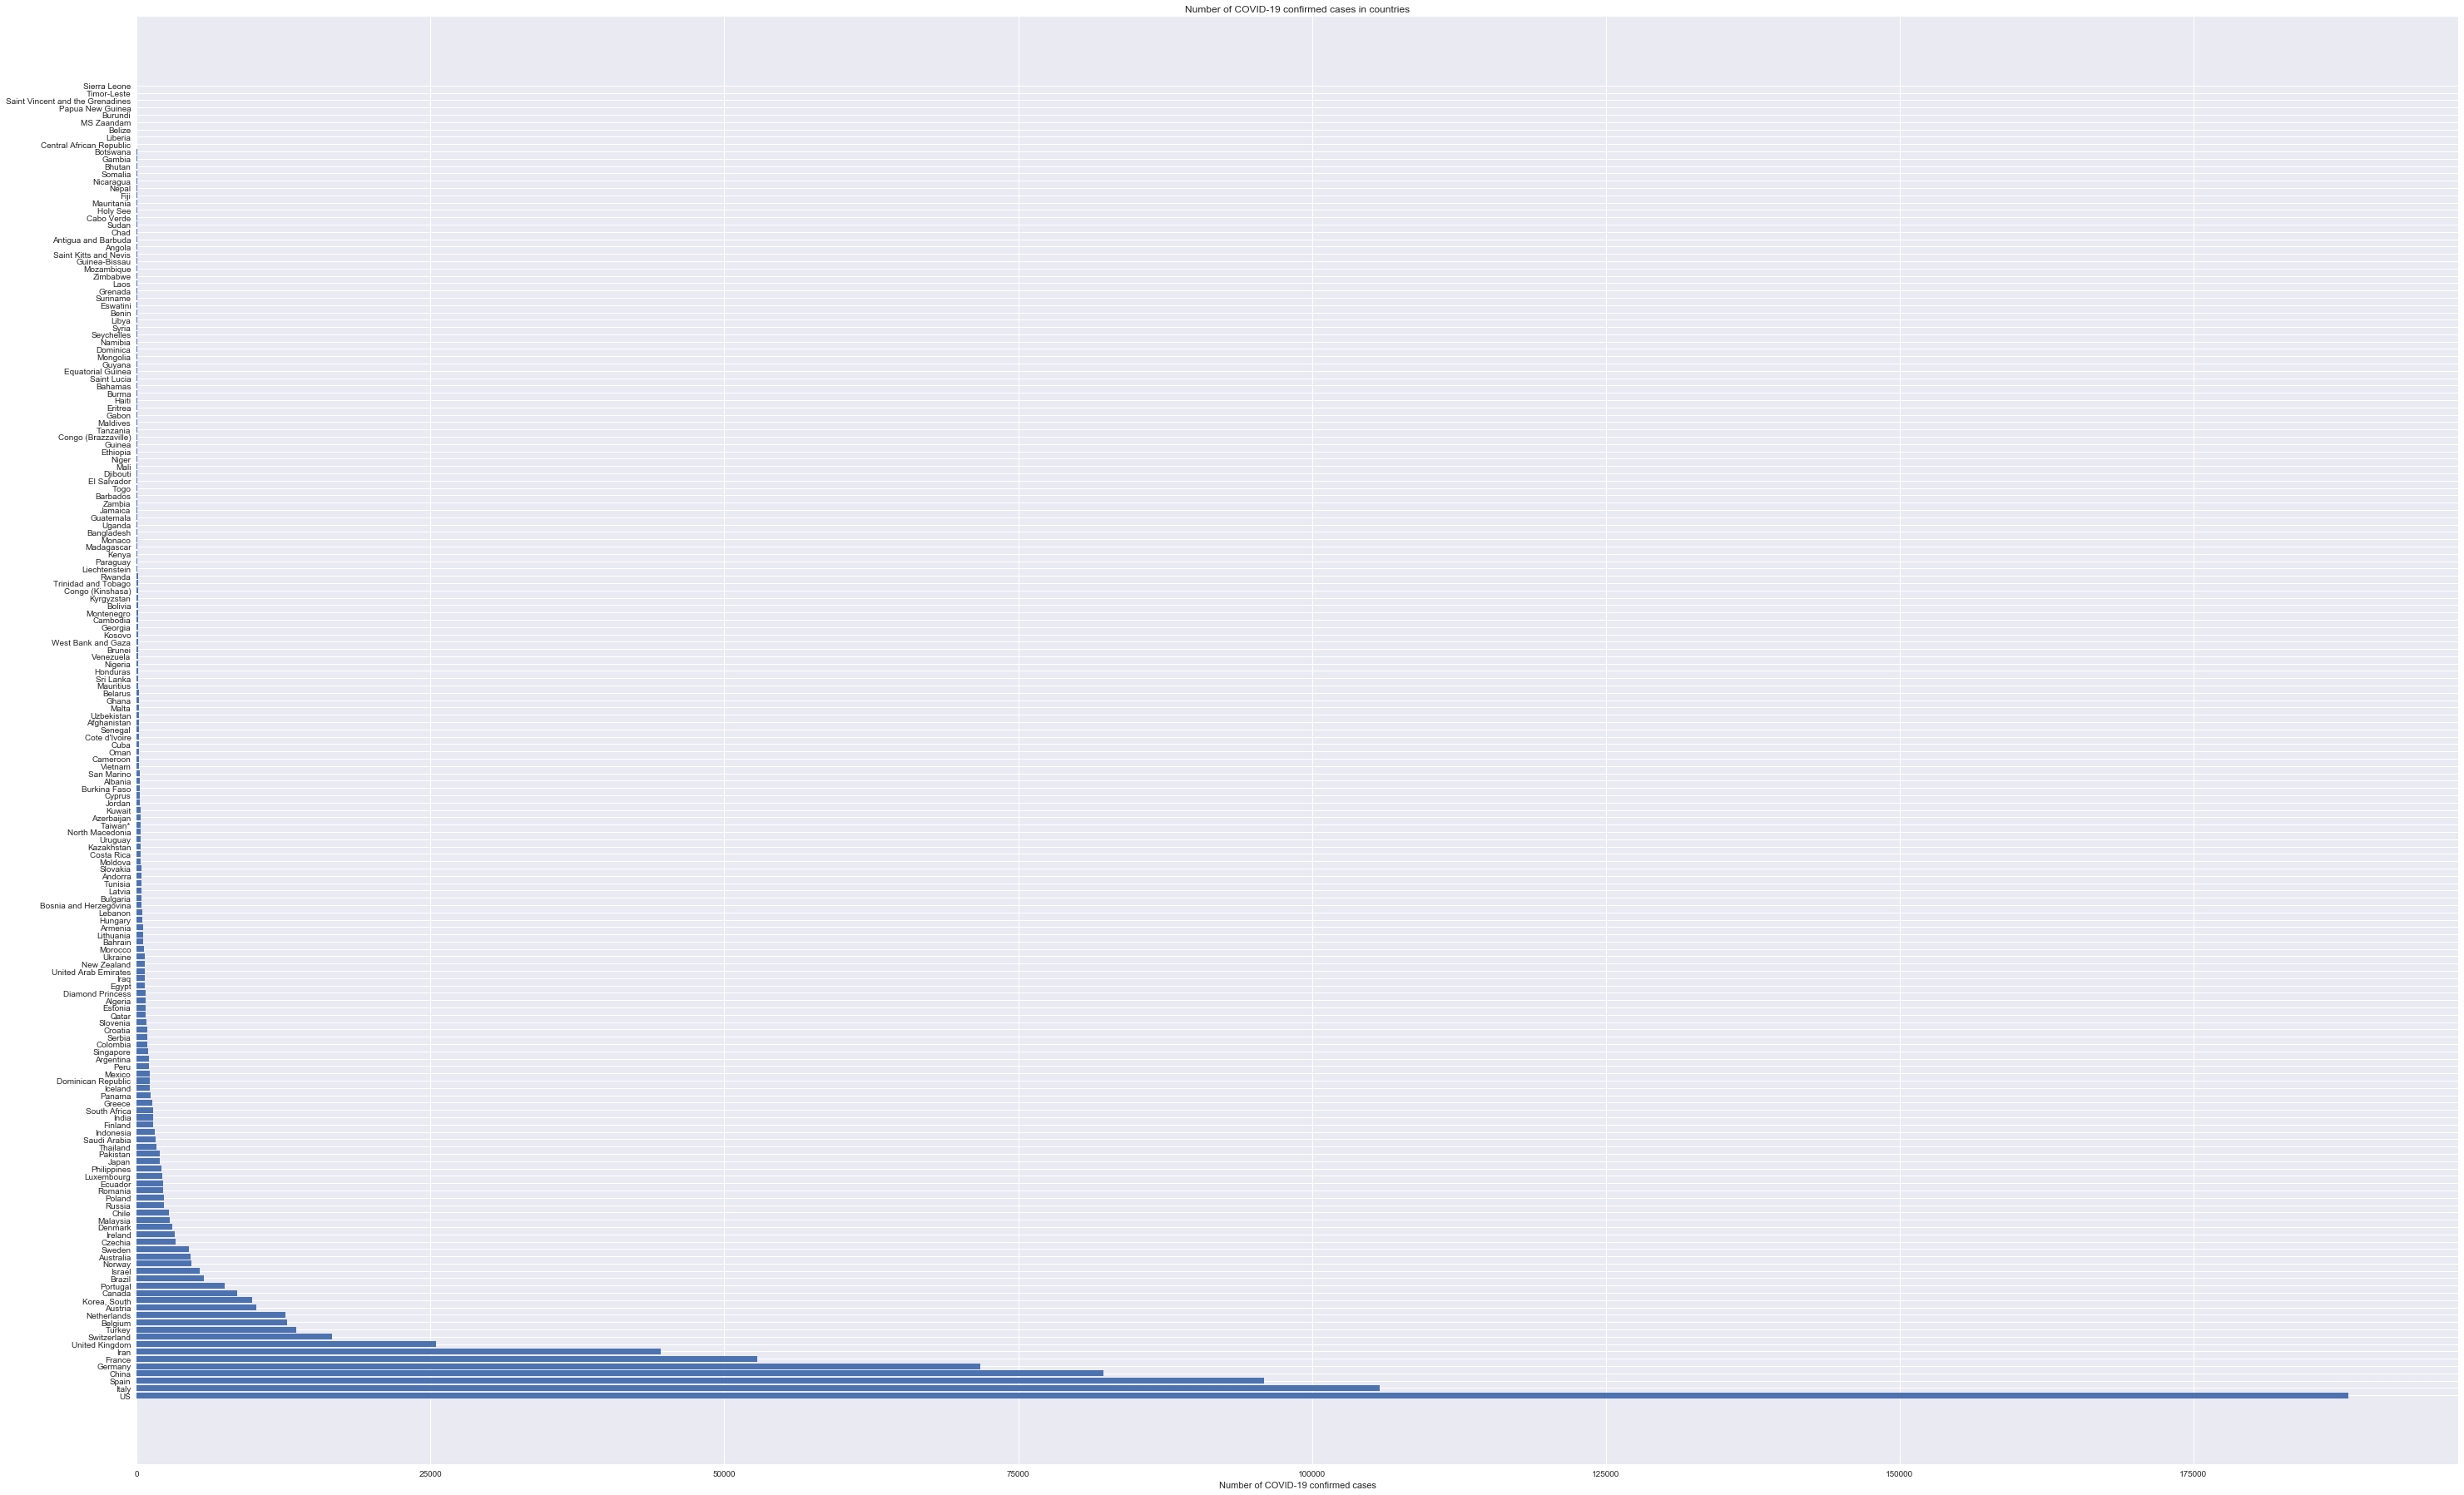

In [41]:
# PLOT A BAR GRAPH TO SEE TOTAL CONFIRMED CASES ACCROSS DIFF COUNTRIES
plt.figure(figsize=(50,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of COVID-19 confirmed cases in countries')
plt.xlabel('Number of COVID-19 confirmed cases')
plt.show()

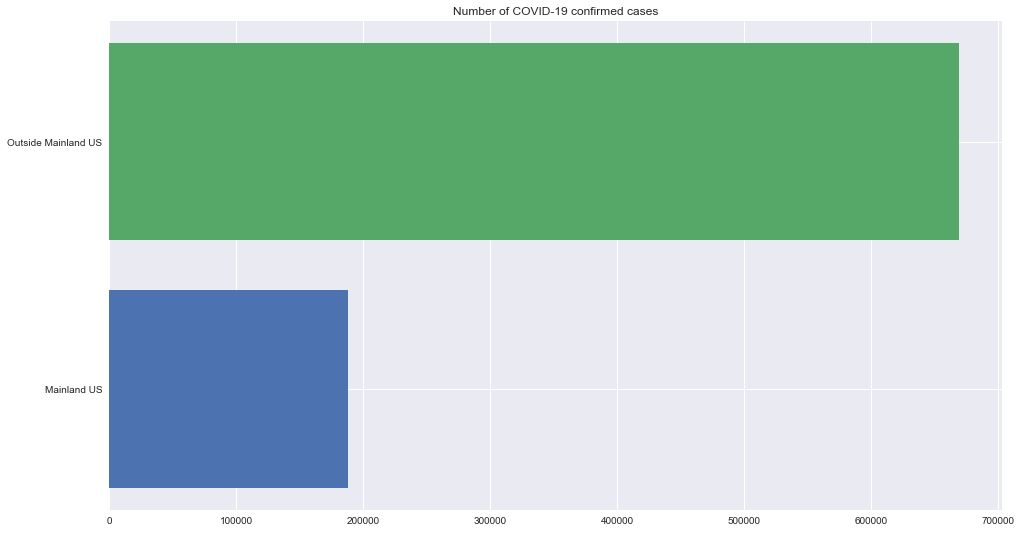

In [42]:
# PLOT BAR GRAPH TO SEE TOTAL CONFIRMED CASES BETWEEN MAINLAND CHINA OR US AND OUTSIDE MAINLAND CHINA
# china_confirmed = latest_confirmed[confirmed_cases['Country/Region'] == 'China'].sum()
# outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
# plt.figure(figsize=(16,9))
# plt.barh('Mainland China', us_confirmed)
# plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
# plt.title('Number of COVID-19 confirmed cases')
# plt.show()
us_confirmed = latest_confirmed[confirmed_cases['Country/Region'] == 'US'].sum()
outside_mainland_us_confirmed = np.sum(country_confirmed_cases) - us_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland US', us_confirmed)
plt.barh('Outside Mainland US', outside_mainland_us_confirmed)
plt.title('Number of COVID-19 confirmed cases')
plt.show()

In [43]:
# PRINT THE TOTAL CASES IN MAINLAND US AND OUTSIDE OF IT
print('Outside Mainland US {} cases'.format(outside_mainland_us_confirmed))
print('Mainland US {} cases'.format(us_confirmed))
print('Total: {} cases'.format(outside_mainland_us_confirmed + us_confirmed))

Outside Mainland US 669315 cases
Mainland US 188172 cases
Total: 857487 cases


In [44]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

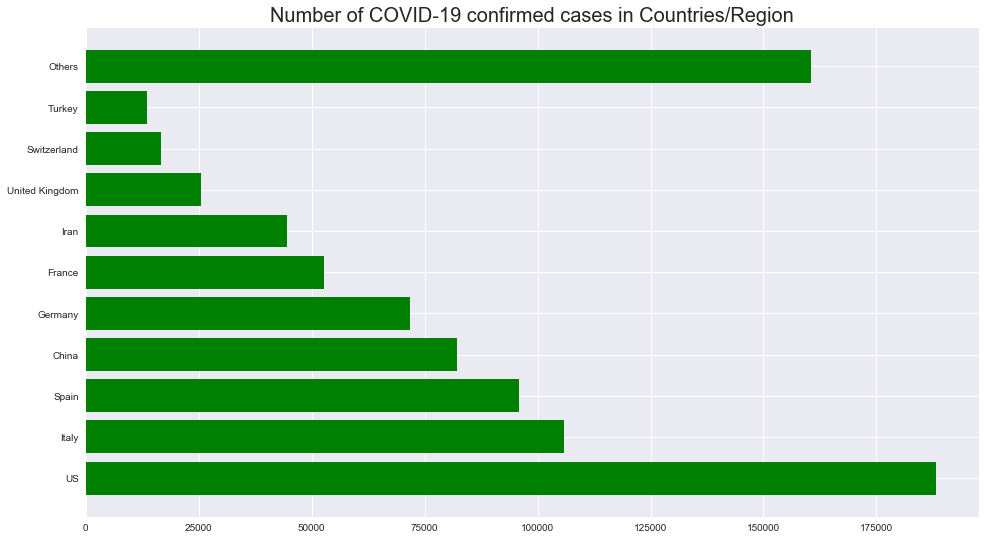

In [46]:
# VISUALIZE 10 COUNRIES
plt.figure(figsize=(16,9))
plt.barh(visual_unique_countries, visual_confirmed_cases,color='g')
plt.title('Number of COVID-19 confirmed cases in Countries/Region', size=20)
plt.show()

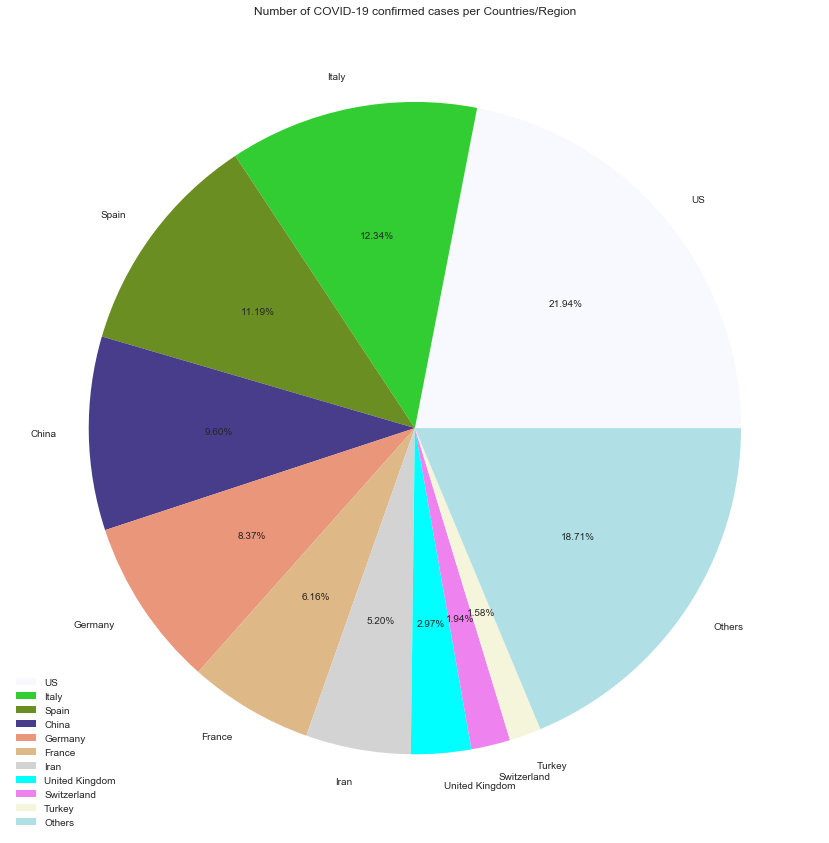

In [48]:
# CREATE PIE CHART TO SHOW 10 COUNTRIES WITH MOST CONFIRMED CASES, THE REST ARE GROUPED AS OTHERS
c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(15,15))
plt.pie(visual_confirmed_cases, labels=visual_unique_countries, colors=c, autopct='%1.2f%%')
plt.legend(visual_unique_countries, loc='best')
plt.title('Number of COVID-19 confirmed cases per Countries/Region')
plt.show()

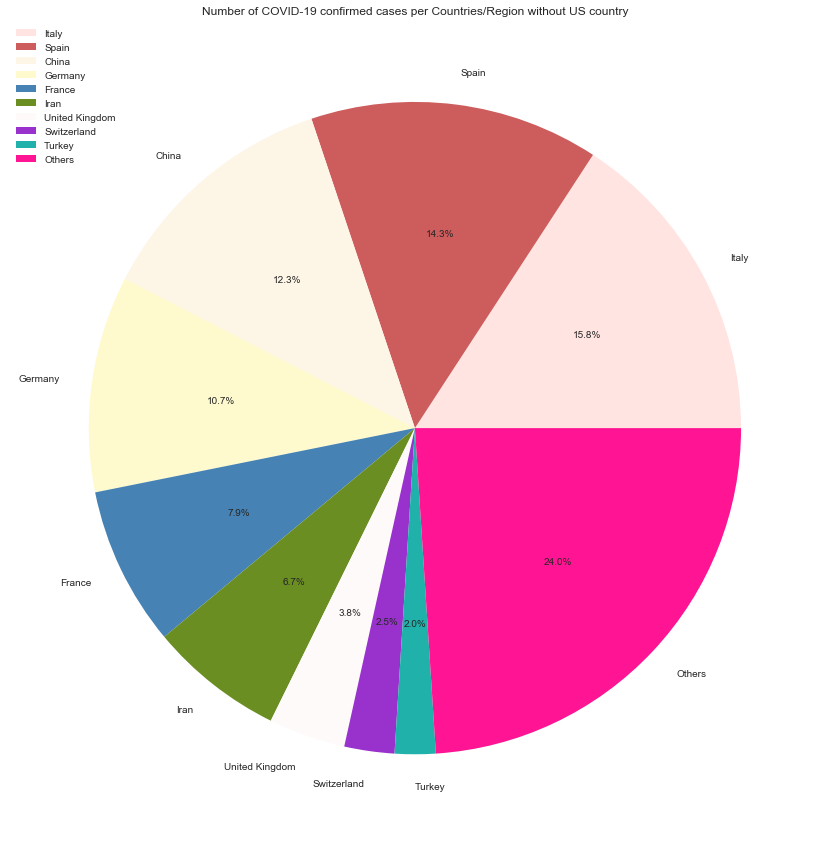

In [49]:
# CREATE PIE CHART TO SHOW 10 COUNTRIES WITH MOST CONFIRMED CASES WITHOUT 'US', THE REST ARE GROUPED AS OTHERS
c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(15,15))
plt.pie(visual_confirmed_cases[1:], labels=visual_unique_countries[1:], colors=c, autopct='%1.1f%%')
plt.legend(visual_unique_countries[1:], loc='best')
plt.title('Number of COVID-19 confirmed cases per Countries/Region without US country')
plt.show()

In [50]:
# CREATING TEST TRAIN DATA
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

# SVM With Hyperparameteric Tuning

In [51]:
# BUILDING SVM MODEL
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
skrinking = [True, False]

svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': skrinking}

svm = SVR()

svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)

svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.1min finished
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=-1,
          param_distributions={'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.01, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [52]:
svm_search.best_params_


{'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 1, 'C': 10}

In [53]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [54]:
svm_confirmed


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.01,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
svm_pred


array([ 30566.75166352,  30567.68507367,  30574.21894474,  30591.95373765,
        30626.4899133 ,  30683.42793261,  30768.36825651,  30886.91134591,
        31044.65766172,  31247.20766487,  31500.16181626,  31809.12057681,
        32179.68440745,  32617.45376908,  33128.02912263,  33717.01092901,
        34389.99964913,  35152.59574391,  36010.39967428,  36969.01190114,
        38034.03288541,  39211.06308801,  40505.70296985,  41923.55299186,
        43470.21361494,  45151.28530002,  46972.36850801,  48939.06369982,
        51056.97133638,  53331.6918786 ,  55768.82578739,  58373.97352368,
        61152.73554838,  64110.7123224 ,  67253.50430666,  70586.71196208,
        74115.93574957,  77846.77613006,  81784.83356445,  85935.70851367,
        90305.00143863,  94898.31280024,  99721.24305943, 104779.39267711,
       110078.36211419, 115623.75183159, 121421.16229024, 127476.19395104,
       133794.44727491, 140381.52272276, 147243.02075553, 154384.54183411,
       161811.68641943, 1

MAE:  272847.68430984387
MSE:  94745948476.21338


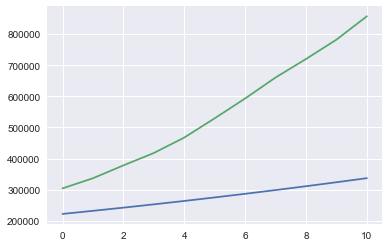

In [56]:
# CHECK TESTING DATA WITH PREDICTED
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE: ', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE: ', mean_squared_error(svm_test_pred, y_test_confirmed))

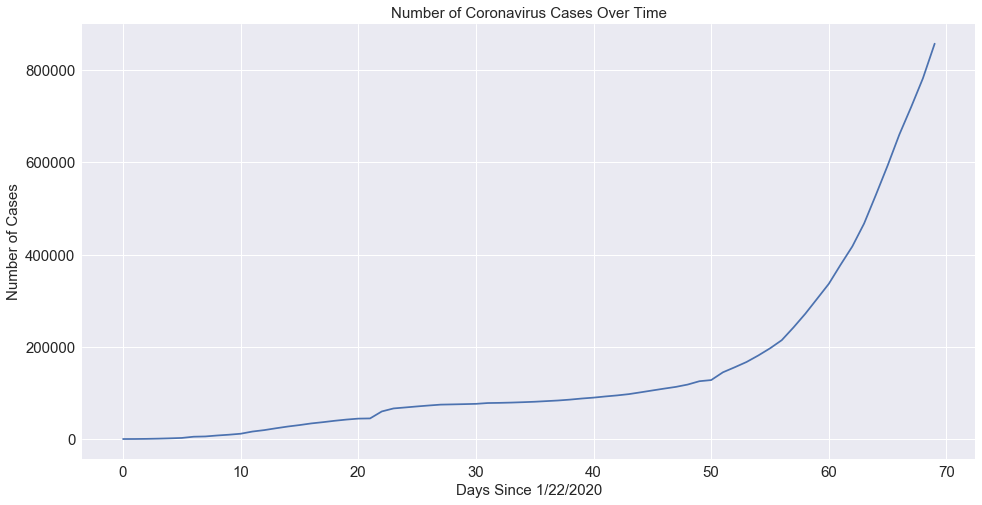

In [57]:
# TOTAL NUMBER OF CORONAVIRUS CASES OVER TIME
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Number of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

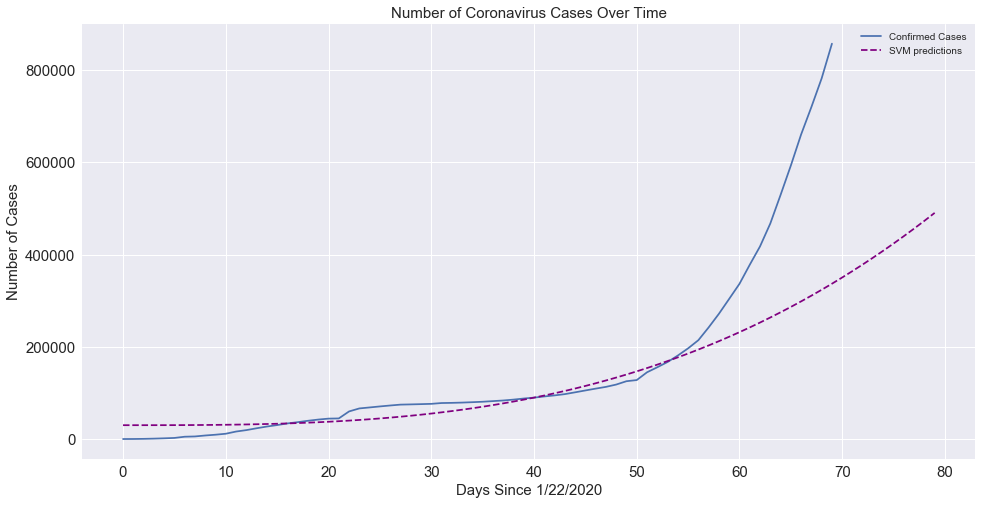

In [58]:
# CONFIRMED VS PREDICTED CASES
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [60]:
# PREDICTION FOR THE NEXT 10 DAYS USING SVM
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('04/01/2020', 350726.4340519825),
 ('04/02/2020', 364644.5128394305),
 ('04/03/2020', 378960.2243519424),
 ('04/04/2020', 393679.16905043717),
 ('04/05/2020', 408806.9473958303),
 ('04/06/2020', 424349.15984903777),
 ('04/07/2020', 440311.40687097725),
 ('04/08/2020', 456699.2889225634),
 ('04/09/2020', 473518.4064647134),
 ('04/10/2020', 490774.3599583459)}

In [61]:
# USING LINEAR REGRESSION MODEL TO MAKE PREDICTIONS
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True,fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 355120.81544551294
MSE: 154395777633.4923


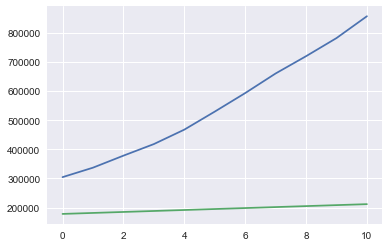

In [62]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)


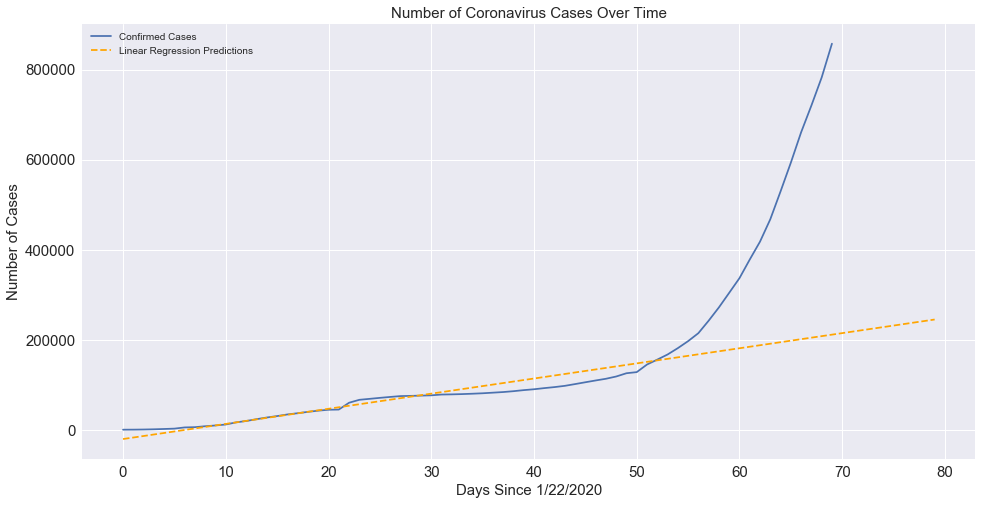

In [63]:
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [64]:
# PREDICTION FOR THE NEXT 10 DAYS USING LINEAR REGRESSION
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[214926.98158971]
 [218285.87200468]
 [221644.76241964]
 [225003.6528346 ]
 [228362.54324956]
 [231721.43366452]
 [235080.32407949]
 [238439.21449445]
 [241798.10490941]
 [245156.99532437]]


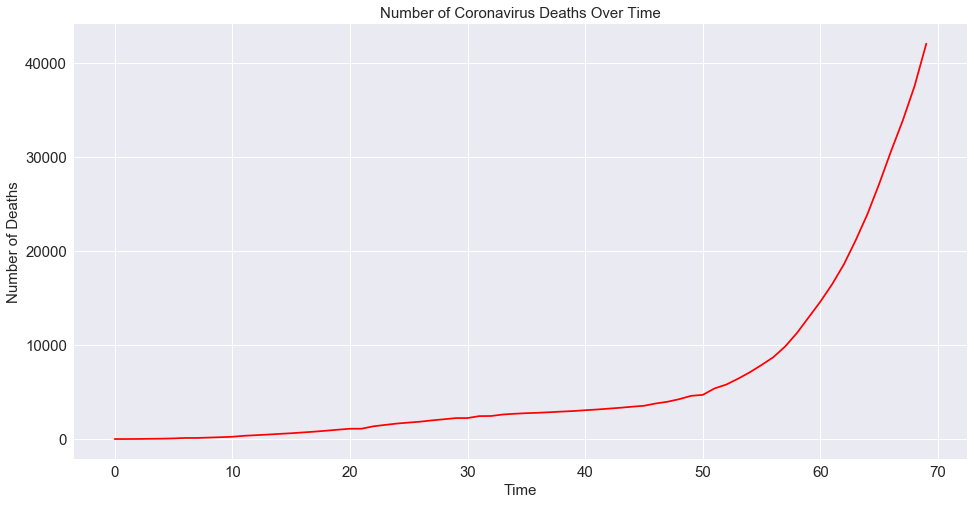

In [65]:
# TOTAL DEATHS OVER TIME
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('Number of Deaths', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

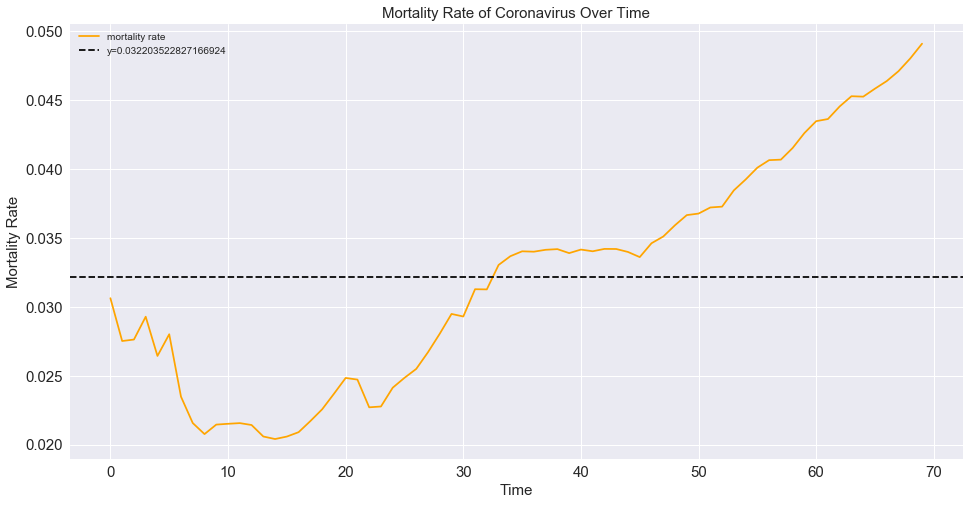

In [66]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=15)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=15)
plt.ylabel('Mortality Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


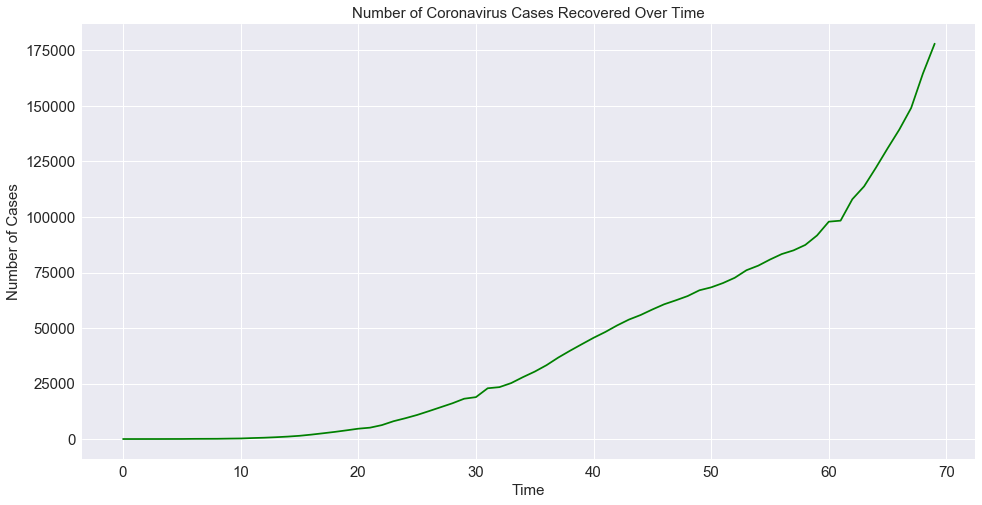

In [67]:
# CORONAVIRUS CASES RECOVERED OVER TIME
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('Number of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

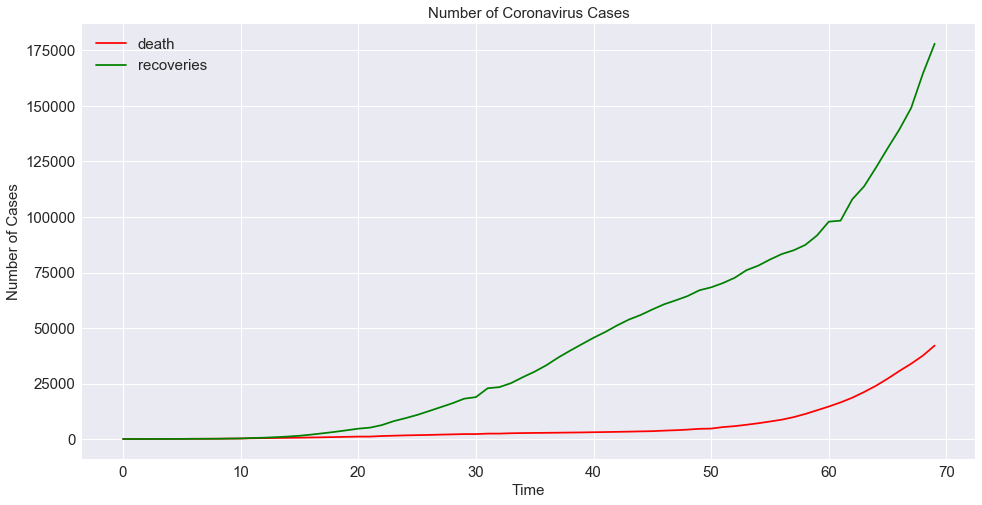

In [68]:
# NUMBER OF CORONAVIRUS CASES RECOVERED VS THE NUMBER OF DEATHS
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=15)
plt.title('Number of Coronavirus Cases', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('Number of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

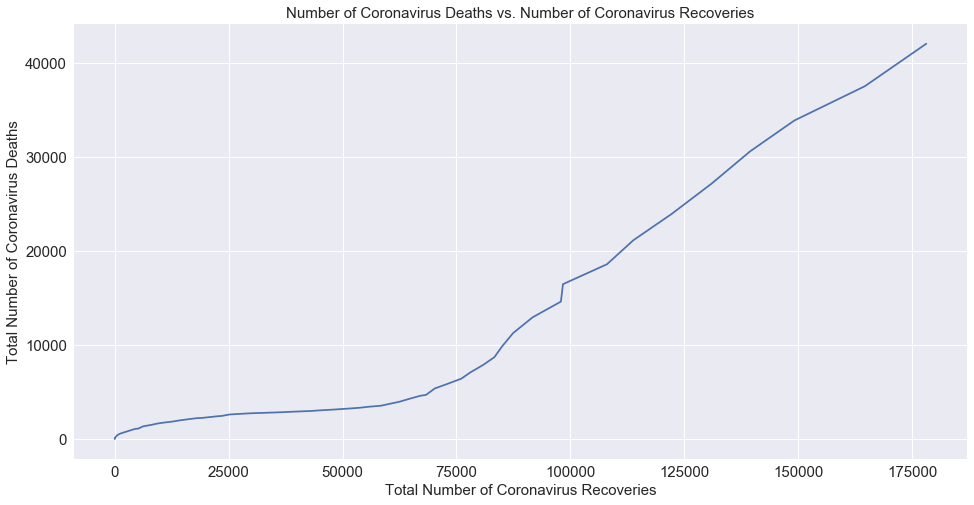

In [69]:
# CORONAVIRUS DEATHS VS RECOVERIES
plt.figure(figsize=(16, 8))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=15)
plt.xlabel('Total Number of Coronavirus Recoveries', size=15)
plt.ylabel('Total Number of Coronavirus Deaths', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

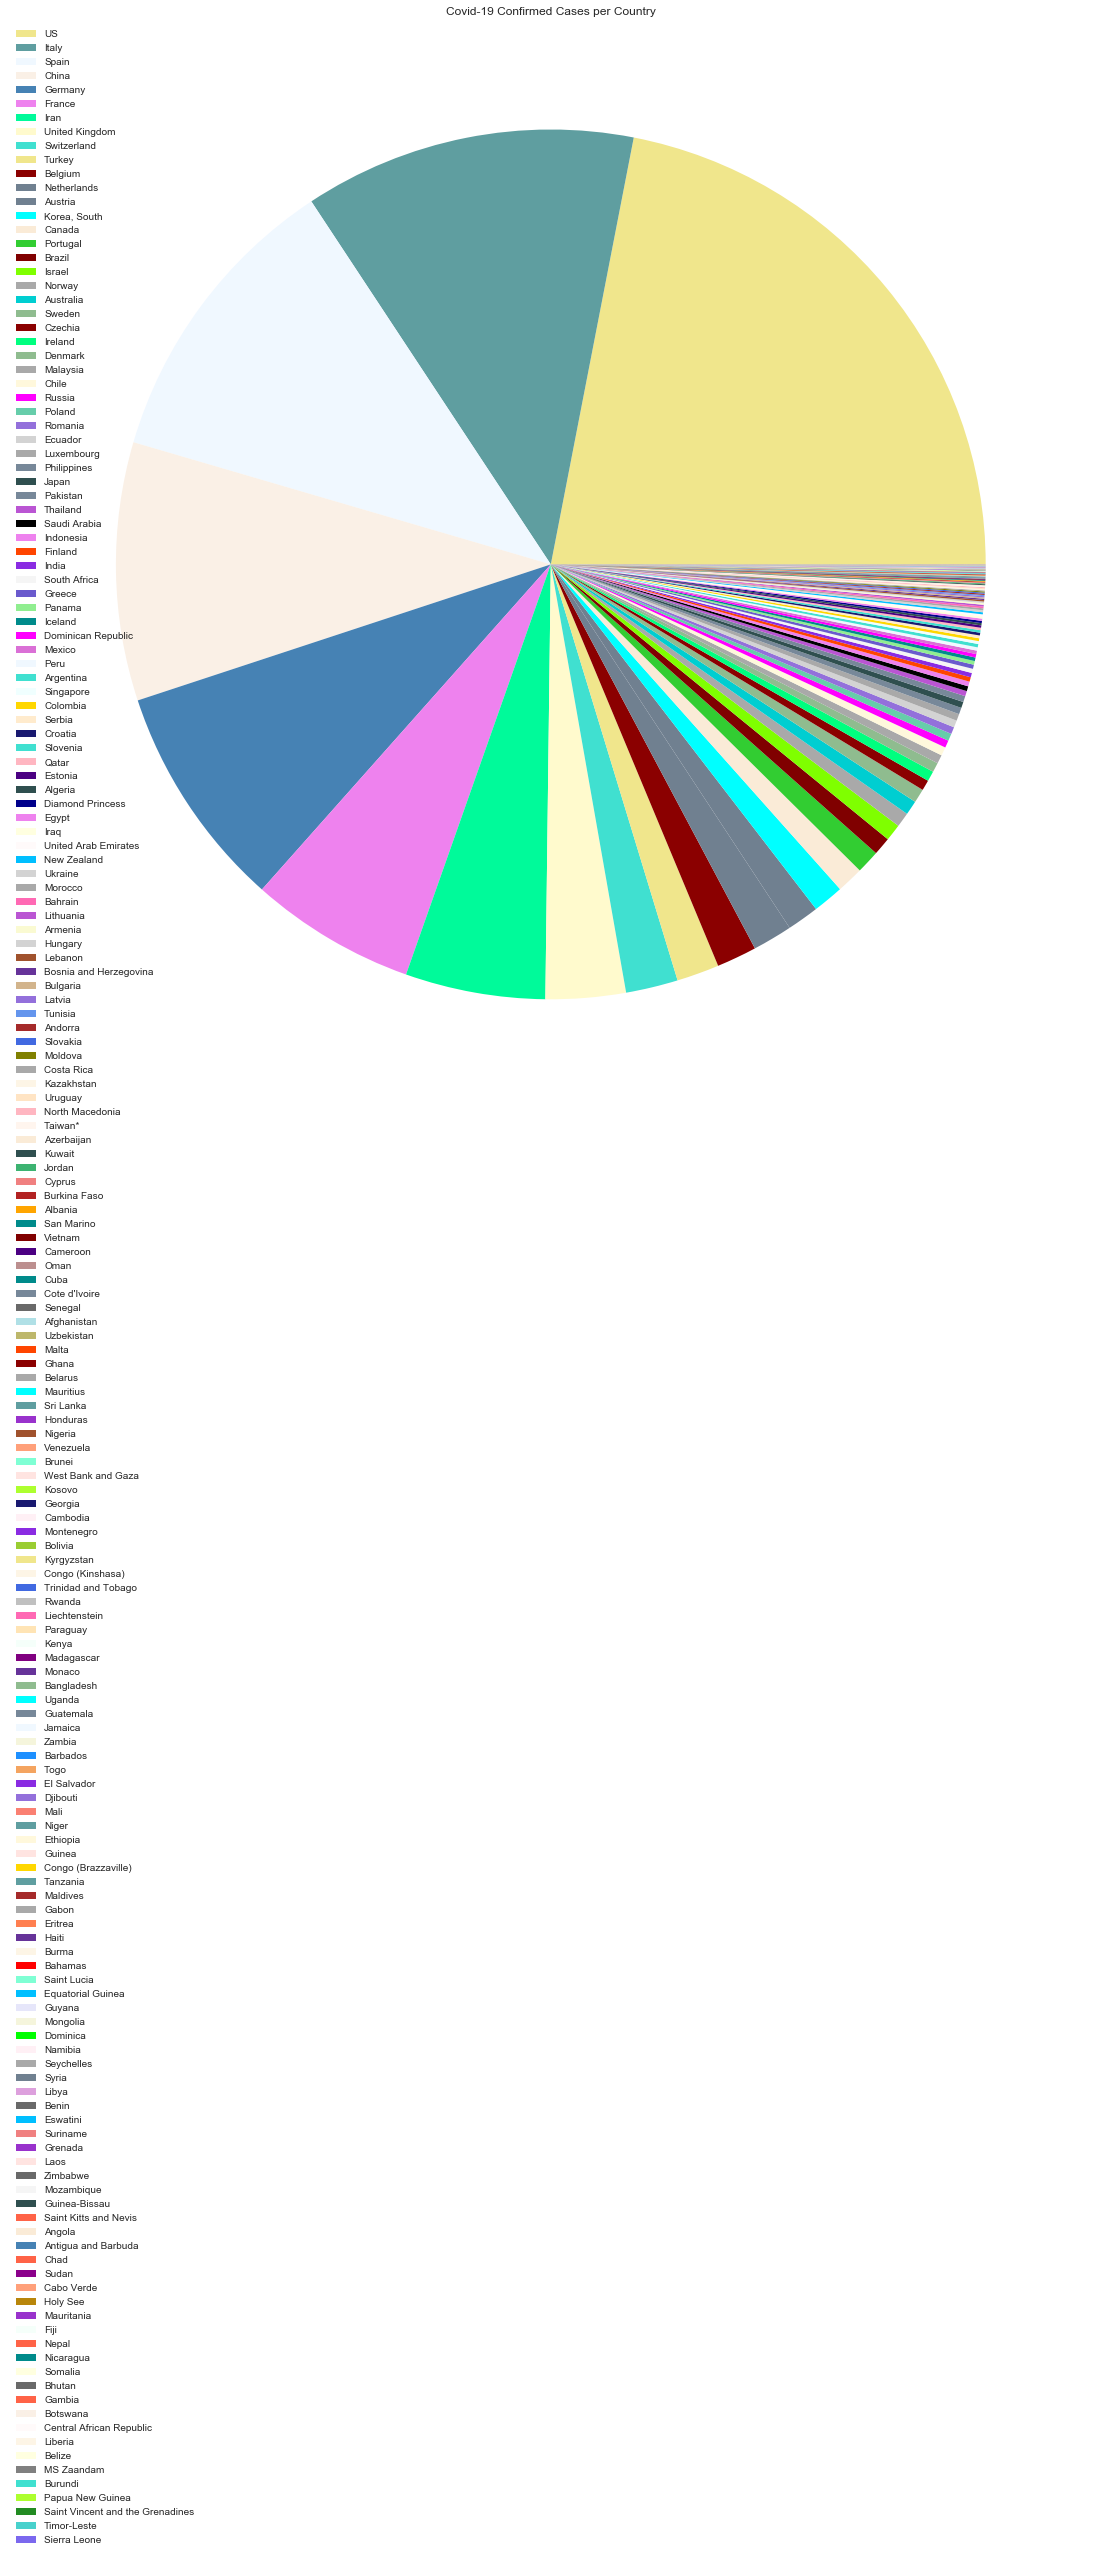

In [70]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

# Random Forest

In [72]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],}

# Instantiate RandomizedSearchCV model
rfr_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=30,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rfr_model.fit(X_train_confirmed, y_train_confirmed)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklear

C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y wa

C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y wa

C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y wa

C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y wa

C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=None,
          param_distributions={'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]), 'max_depth': [None, 3, 7, 10], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_features': [0.5, 1, 'sqrt', 'auto']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [74]:
test_rfr_pred = rfr_model.predict(X_test_confirmed)
rfr_pred = rfr_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_rfr_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_rfr_pred, y_test_confirmed))

MAE: 333859.5626767677
MSE: 143410806738.6069


In [76]:
print('Random Forest Regessor prediction: ', set(zip(future_forcast_dates[-4:], rfr_pred[-4:])))

Random Forest Regessor prediction:  {('04/08/2020', 216034.89186868686), ('04/07/2020', 216034.89186868686), ('04/10/2020', 216034.89186868686), ('04/09/2020', 216034.89186868686)}
